# Investigating the impact Higher Education has on Quality of Life for Missouri Citizens

From a comprehensive dataset provided for Missouri, with multiple indicators present, I have decided to focus on the impact college education has on the quality of life in a county.

I want to particularly focus on the differences in the quality of life that arise with respect to the rural and urban setting, carrying out a holistic analysis while looking at multiple factors such as median income, food scarcity, Gini index and even something someone might consider as rudimentary as internet speeds.

The data sources utilized for the purpose of this project are comprised of the metadata and dataset available of Missouri county records. No further datasets are utilized.

It is imperative to mould and present the project in the most appropriate manner, so that the relevant stakeholders can grasp what is being represented and what are the most meaningful relationships extrapolated from the data.

For the purpose of this project, I am looking at the general populace as the subject audience, while testing out the hypothesis
of the advancement in quality of life, if any by the attainment of college education as well as the differences in the increase in improvement in quality of life in an urban and rural setting.

I want to investigate the impact gaining a college education has on life overall as well as the adversities one encounters before gaining said education, which could result in the subsequent quality of life as well.

The files I have used are attached in the github repository, listed below:

MO_County_Data_CSV_DSA7010_Project_Data.csv
Dataset used.



MO_County_Data_CSV_DSA7010_Project_Data_Metadata.csv
Metadata used.

In [44]:
#all the required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
#Loading dataset
data = pd.read_csv('MO_County_Data_CSV_DSA7010_Project_Data.csv')
data.head()

,cnty_fips,cnty_name,povpct,pop_2014,pop_densit,age_lt18,pct_age_lt,age_18_65,pct_age_18,age_gt_65,...,COVVac1Dos,COVFullVac,PctCOV1Dos,PctCOVFull,Cen2000PR,Cen2010PR,AllC_AAIRt,AllC_AvAnC,AllC_Statu,AllC_Rec5Y
0,29001,Adair,26.9,25602,44.864523,4759,18.6,17400,68.0,3443,...,9899,8783,0.39,0.35,0.79,0.81,456.3,116,stable,0.0
1,29003,Andrew,10.7,17379,39.784793,4020,23.1,10393,59.8,2967,...,5414,4879,0.31,0.28,0.81,0.79,427.3,98,stable,-0.1
2,29005,Atchison,12.2,5382,9.795111,1078,20.0,3046,56.6,1258,...,2364,2131,0.45,0.40,0.77,0.74,393.4,32,stable,-0.9
3,29007,Audrain,17.2,25887,37.117682,6068,23.4,15554,60.1,4265,...,8465,7161,0.33,0.28,0.79,0.80,464.9,148,falling,-1.0
4,29009,Barry,20.2,35662,45.068915,8321,23.3,20248,56.8,7093,...,14197,11608,0.40,0.33,0.69,0.60,386.1,196,stable,-0.7


In [46]:
#Loading metadata

meta_data = pd.read_csv('MO_County_Data_CSV_DSA7010_Project_Data_Metadata.csv')
meta_data.head()

,risk factor,field,description,source url,source description
0,exposure,Population,Total Population 2019 ACS estimate,https://showmestrong.mo.gov/data-download/,NaN
1,exposure,TotalCases,Total Cases,https://showmestrong.mo.gov/data-download/,NaN
2,exposure,TotalDeath,Total Deaths,https://showmestrong.mo.gov/data-download/,NaN
3,exposure,TotalTests,Total Tests,https://showmestrong.mo.gov/data-download/,NaN
4,exposure,Case_7Day,Case 7 Days,https://showmestrong.mo.gov/data-download/,NaN


In [47]:
#First let's print out the columns name of the dataset
for column_name in data.columns[:267]:
    print(column_name)

cnty_fips
cnty_name
povpct
pop_2014
pop_densit
age_lt18
pct_age_lt
age_18_65
pct_age_18
age_gt_65
pct_age_gt
female_tot
female_pct
male_total
male_pct
rural_totp
rural_pct
urban_totp
urban_pct
maxeducHS
maxeducSom
pct_unempl
pricarephy
pcp_per_ca
dentist_to
dentist_pe
mentalhp_t
mentalhp_p
preventHos
food_insec
limit_food
res_concxn
pctpopwbba
pctpopwobb
pctdsgt15K
pctdsgt25K
pctdsgt50K
pctdsgt100
pctdsgt1G_
pctusgt1K3
pctusgt3K4
pctusgt4K6
pctusgt6K1
pctusgt10K
pctusgt15K
pctusgt25K
pctusgt50K
pctusgt100
pctusgt1G_
mcds_prop
mcds_tier
mcus_prop
mcus_tier
provcnt_bu
provcnt_co
cumm_pro_1
cumm_pro_2
cumm_pro_3
cumm_pro_4
cumm_pro_5
cumm_pro_6
cumm_pro_7
cumm_pro_8
pctpopdsgt
pctpopusgt
hcf_13_15
tcf_13_15
bpr_ruralp
nchs_rural
omb_rural
rucc_2013
rucc_metro
usac_rural
rural_totp.1
rural_pct.1
limit_food.1
Common_dow
Common_upl
AveMinHosp
AveMinUrgC
AveMinPubH
AveMinNurs
AveMinECHO
GiniIndex
TPopS2701
HspanyRace
PctHispani
AfrAmer
PctAfAmer
Disability
PctDisable
InsTpop
InsHisp
InsAfAmer

The range of data present here is expensive and by no means is all of it really useful for us. So what we are going to do is choose the columns that are useful for us. We will focus on some variables we consider imperative in our analysis, such as:

* Quality of Life Indicators: povpct (poverty), limit_food (food scarcity)
* GINI Index: GiniIndex
* Healthcare Access: pricarephy (primary care physicians per capita)
* Income Metrics: E_MEDINC
* Unemployment Rates: pct_unempl
* Transportation and Commute: Work_InSInCnty (work inside same county)
* Food Scarcity: limit_food, limit_food.1, food_insec
* Broadband Speeds: Identified indirectly using population-related density metrics (e.g., HUDensity)

In [48]:
quality_of_life_columns_filtered = ['povpct', 'limit_food']
gini_index_filtered = ['GiniIndex']
healthcare_access_filtered = ['pricarephy']
income_columns_filtered = ['E_MEDINC']
unemployment_filtered = ['pct_unempl']
transportation_commute_filtered = ['Work_InSInCnty']
food_scarcity_filtered = ['limit_food', 'limit_food.1', 'food_insec']
broadband_speed_filtered = ['HUDensity']
college_education_columns = [
    'E_EDUC_Col', 'P_EDUC_Col', 'EVetEDUC_C', 'PVetEDUC_C', 
    'E_EDUC_Bac', 'P_EDUC_Bac', 'EVetEDUC_B', 'PVetEDUC_B'
]
location_columns = ['cnty_fips', 'cnty_name']
rural_pop = ['rural_pct']
filtered_columns = (
    location_columns + college_education_columns+ quality_of_life_columns_filtered + gini_index_filtered + 
    healthcare_access_filtered + rural_pop +income_columns_filtered + unemployment_filtered + 
    transportation_commute_filtered + food_scarcity_filtered + broadband_speed_filtered)


filtered_data = data[filtered_columns].dropna()

filtered_data = filtered_data.rename(columns={
    'limit_food.1': 'limit_food_alt',
    'pricarephy.1': 'pricarephy_alt'
})


filtered_data

,cnty_fips,cnty_name,E_EDUC_Col,P_EDUC_Col,EVetEDUC_C,PVetEDUC_C,E_EDUC_Bac,P_EDUC_Bac,EVetEDUC_B,PVetEDUC_B,...,GiniIndex,pricarephy,rural_pct,E_MEDINC,pct_unempl,Work_InSInCnty,limit_food,limit_food_alt,food_insec,HUDensity
0,29001,Adair,3354,24.8,417,29.5,4058,30.0,324,22.9,...,0.513,32,37.9,19948,5.4,87.7,9,9,17,7.841
1,29003,Andrew,3620,30.0,405,36.7,2869,23.8,250,22.6,...,0.415,2,61.3,30332,4.8,24.1,4,4,11,6.368
2,29005,Atchison,1119,28.5,152,35.3,885,22.5,63,14.7,...,0.417,2,100.0,27793,5.2,72.6,2,2,13,2.125
3,29007,Audrain,4340,24.6,405,22.9,2557,14.5,268,15.1,...,0.439,18,41.2,23528,5.8,71.9,7,7,15,6.097
4,29009,Barry,6632,26.9,982,33.6,3562,14.5,501,17.2,...,0.451,18,73.3,22485,5.8,70.7,3,3,14,8.507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,29223,Wayne,2654,27.5,395,30.7,988,10.3,154,12.0,...,0.443,6,100.0,18551,7.5,64.4,19,19,17,4.024
111,29225,Webster,7777,31.5,932,38.4,4170,16.9,314,12.9,...,0.413,6,73.9,25525,6.4,39.3,2,2,15,9.472
112,29227,Worth,404,27.4,43,30.9,259,17.5,28,20.1,...,0.388,1,100.0,25474,4.1,51.0,10,10,13,1.832
113,29229,Wright,3131,25.2,513,36.1,1407,11.3,127,8.9,...,0.491,6,76.6,19492,7.1,56.4,6,6,18,4.893


In [49]:
# Calculating summary statistics
filtered_data.describe()

,cnty_fips,E_EDUC_Col,P_EDUC_Col,EVetEDUC_C,PVetEDUC_C,E_EDUC_Bac,P_EDUC_Bac,EVetEDUC_B,PVetEDUC_B,povpct,...,GiniIndex,pricarephy,rural_pct,E_MEDINC,pct_unempl,Work_InSInCnty,limit_food,limit_food_alt,food_insec,HUDensity
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,29117.713043,10799.556522,28.403478,1282.930435,33.037391,10239.304348,18.364348,830.034783,16.133043,17.976522,...,0.435409,36.391304,66.804348,24903.017391,6.493043,61.485217,7.704348,7.704348,15.469565,23.230757
std,75.816001,25569.090145,3.206351,2709.516050,6.086157,33237.987728,7.149864,2296.559730,6.729129,4.713295,...,0.029926,126.645153,28.177954,4206.451196,1.159909,16.202692,6.233714,6.233714,2.099798,94.518487
min,29001.000000,404.000000,21.000000,43.000000,17.400000,259.000000,9.400000,21.000000,5.900000,6.800000,...,0.375000,0.000000,0.000000,15665.000000,4.100000,24.100000,0.000000,0.000000,11.000000,1.592000
25%,29058.000000,2000.500000,26.400000,246.500000,29.900000,994.500000,13.650000,101.500000,11.450000,15.350000,...,0.412000,3.000000,46.000000,22066.000000,5.700000,50.600000,3.500000,3.500000,14.000000,3.638000
50%,29115.000000,3488.000000,28.100000,427.000000,33.800000,2015.000000,16.500000,205.000000,14.800000,18.000000,...,0.432000,6.000000,68.900000,24422.000000,6.400000,62.500000,6.000000,6.000000,15.000000,5.740000
75%,29172.000000,7874.000000,30.500000,1122.500000,36.900000,4389.500000,20.100000,464.500000,19.350000,20.700000,...,0.457500,20.000000,100.000000,26629.500000,7.300000,73.000000,10.000000,10.000000,16.500000,10.528000
max,29510.000000,199326.000000,36.900000,20887.000000,46.400000,297525.000000,46.000000,19824.000000,39.500000,32.200000,...,0.513000,1203.000000,100.000000,39869.000000,10.000000,91.800000,36.000000,36.000000,26.000000,946.112000


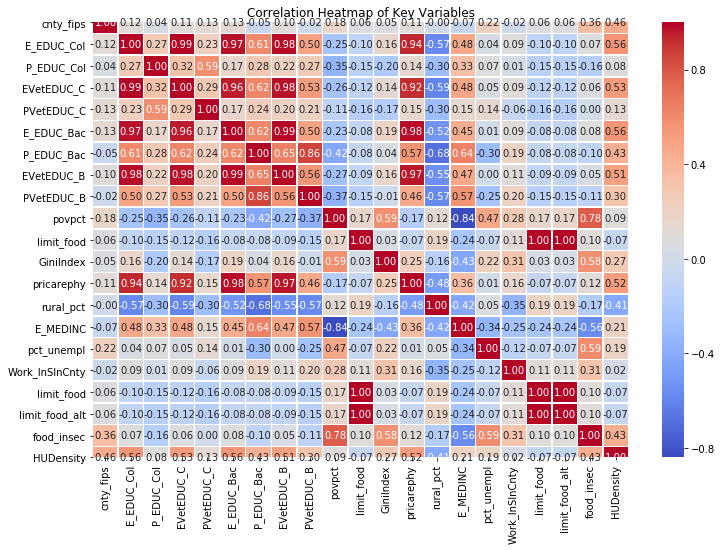

In [50]:
#Now let's move onto the step of exploratory data analysis to explore and visualize any relationships.
# Visualizing correlations using a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix_cleaned = filtered_data.corr()
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Key Variables")
plt.show()

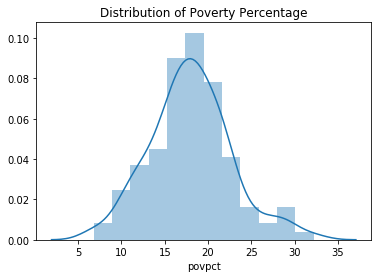

<Figure size 432x288 with 0 Axes>

In [51]:
# Exploring distributions using histograms
sns.distplot(filtered_data['povpct'], kde=True)
plt.title('Distribution of Poverty Percentage')
plt.show()
plt.tight_layout()
plt.show()

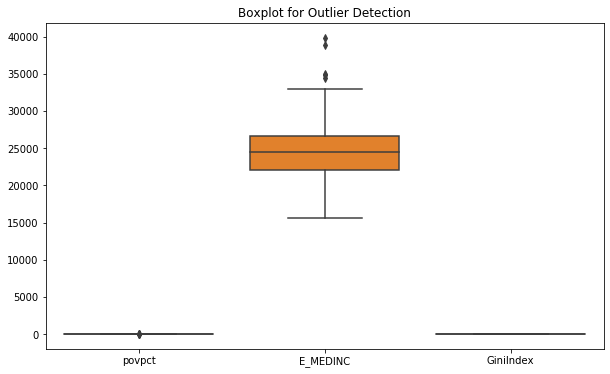

In [52]:
# Detecting outliers using box plots
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.boxplot(data=filtered_data[['povpct', 'E_MEDINC', 'GiniIndex']], ax=ax)
ax.set_title("Boxplot for Outlier Detection")
plt.show()

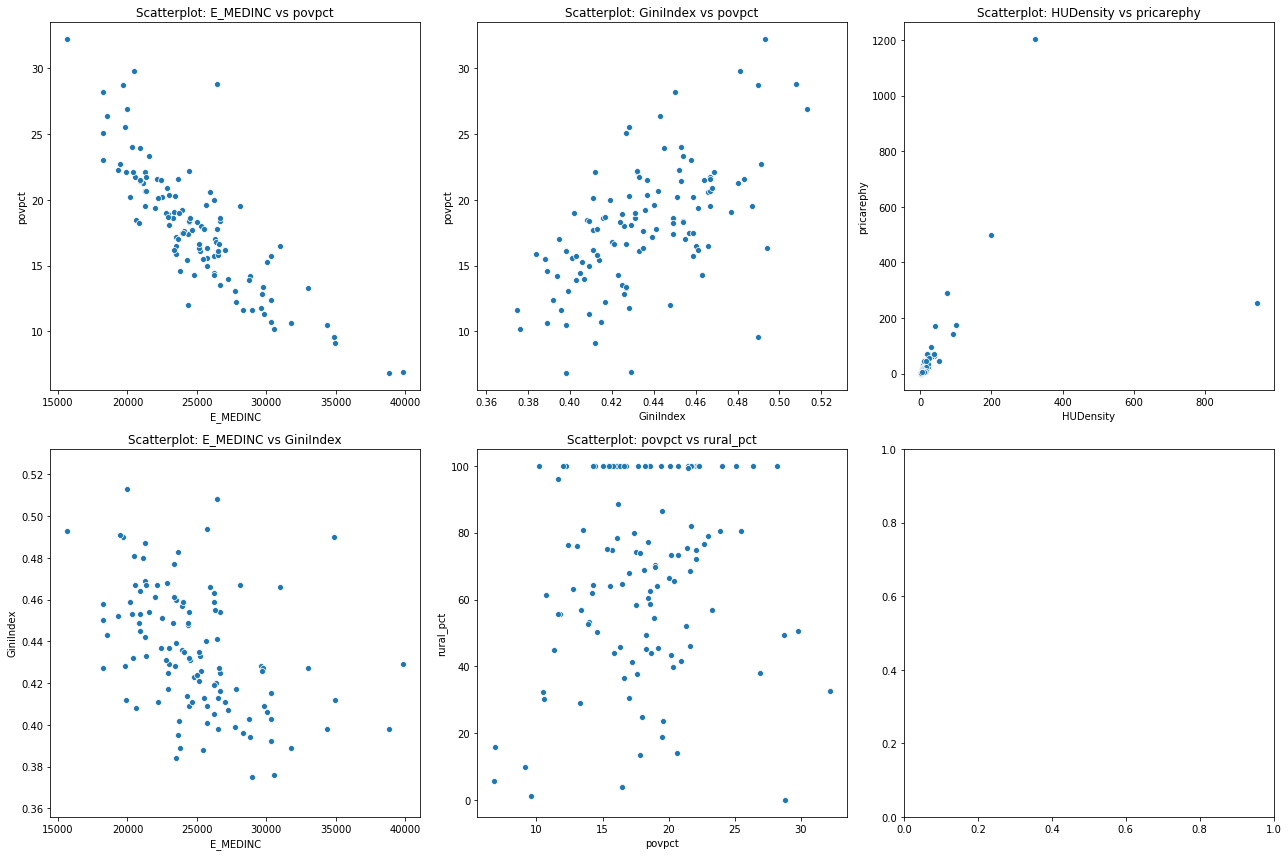

In [53]:
#Showcasing relationships using Scatter Plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
bivariate_pairs = [
    ('E_MEDINC', 'povpct'),
    ('GiniIndex', 'povpct'),
    ('HUDensity', 'pricarephy'),
    ('E_MEDINC', 'GiniIndex'), 
    ('povpct','rural_pct')
]

for ax, (x_var, y_var) in zip(axes.flatten(), bivariate_pairs):
    sns.scatterplot(data=filtered_data, x=x_var, y=y_var, ax=ax)
    ax.set_title(f'Scatterplot: {x_var} vs {y_var}')

plt.tight_layout()
plt.show()

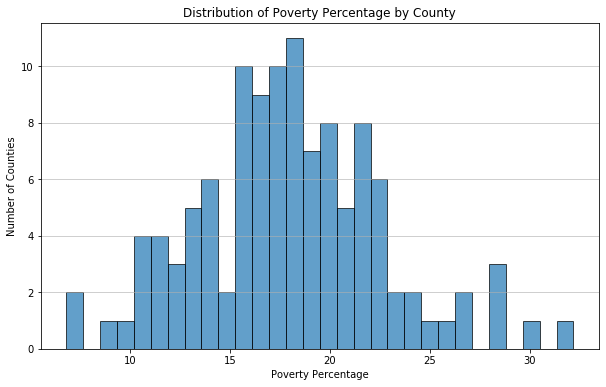

In [54]:
# Histogram relating Poverty Levels with Counties
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['povpct'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribution of Poverty Percentage by County')
plt.xlabel('Poverty Percentage')
plt.ylabel('Number of Counties')
plt.grid(axis='y', alpha=0.75)
plt.show()

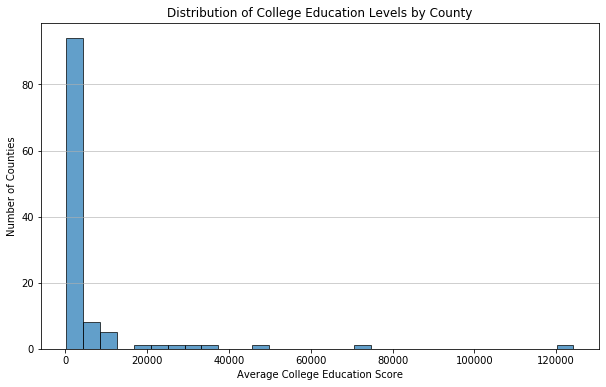

In [55]:
# Create an average college education score
filtered_data['avg_college_education'] = filtered_data[
    ['E_EDUC_Col', 'P_EDUC_Col', 'E_EDUC_Bac', 'P_EDUC_Bac']
].mean(axis=1)
# Histogram relating College Education with Counties
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['avg_college_education'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribution of College Education Levels by County')
plt.xlabel('Average College Education Score')
plt.ylabel('Number of Counties')
plt.grid(axis='y', alpha=0.75)
plt.show()

Now we move onto building, validating and describing the models to be deployed.

For this, we first identify essential variables, specifically honing in on povpct (poverty percentage) as the target variable. The predictor variables we will be using this would be the parameters of college education, median income levels, healthcare access and GiniIndex. Ofcourse the difference between urban and rural indicators also needs to be incorporated.

The framework we will be deploying for this would be linear and logistic regressions, after which we will be evaluating said models using AUC-ROC for logisitic regression, while R-squared for linear models.

In [56]:
#The process as follows below:
filtered_data['urban_rural'] = filtered_data['rural_pct'].apply(lambda x: 1 if x > 100 else 0)

# 2. Select predictor and target variables
X = filtered_data[['E_EDUC_Col', 'E_EDUC_Bac', 'E_MEDINC', 'pricarephy', 'GiniIndex', 'urban_rural']]
y = filtered_data['povpct']

# 3. Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 4. Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)

# Output the RMSE and R-squared score
print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

RMSE: 1.91
R-squared: 0.86


In [61]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#First, let's cross validate our findings using linear regression.

# 1. Add Interaction Term: College Education * Urban/Rural
filtered_data['edu_urban_interaction'] = (
    filtered_data['avg_college_education'] * filtered_data['urban_rural']
)

# 2. Update Predictor Variables to Include the Interaction Term
X = filtered_data[['E_EDUC_Col', 'E_EDUC_Bac', 'E_MEDINC', 'pricarephy', 
                   'GiniIndex', 'urban_rural', 'edu_urban_interaction']]
y = filtered_data['povpct']

# 3. Initialize Ridge Regression Model (with Alpha Regularization)
ridge_model = Ridge(alpha=1.0)

# 4. Perform k-Fold Cross-Validation (with k=5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(ridge_model, X, y, cv=kf, scoring='r2')

# 5. Fit the Model and Evaluate Cross-Validation Scores
ridge_model.fit(X, y)
cv_mean_score = np.mean(cv_scores)

# Output the Cross-Validation Results
print(f'Cross-Validation R-squared Scores: {cv_scores}')
print(f'Average Cross-Validation R-squared: {cv_mean_score:.2f}')

# 1. Add Interaction Term: College Education * Urban/Rural
filtered_data['edu_urban_interaction'] = (
    filtered_data['avg_college_education'] * filtered_data['urban_rural']
)

# 2. Update Predictor Variables to Include the Interaction Term
X = filtered_data[['E_EDUC_Col', 'E_EDUC_Bac', 'E_MEDINC', 'pricarephy', 
                   'GiniIndex', 'urban_rural', 'edu_urban_interaction']]
y = filtered_data['povpct']

# 3. Initialize Ridge Regression Model (with Alpha Regularization)
ridge_model = Ridge(alpha=1.0)

# 4. Perform k-Fold Cross-Validation (with k=5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(ridge_model, X, y, cv=kf, scoring='r2')

# 5. Fit the Model and Evaluate Cross-Validation Scores
ridge_model.fit(X, y)
cv_mean_score = np.mean(cv_scores)

# Output the Cross-Validation Results
print(f'Cross-Validation R-squared Scores: {cv_scores}')
print(f'Average Cross-Validation R-squared: {cv_mean_score:.2f}')

Cross-Validation R-squared Scores: [ 0.83570163  0.65738702  0.56966763 -1.85271011  0.62834535]
Average Cross-Validation R-squared: 0.17
Cross-Validation R-squared Scores: [ 0.83570163  0.65738702  0.56966763 -1.85271011  0.62834535]
Average Cross-Validation R-squared: 0.17


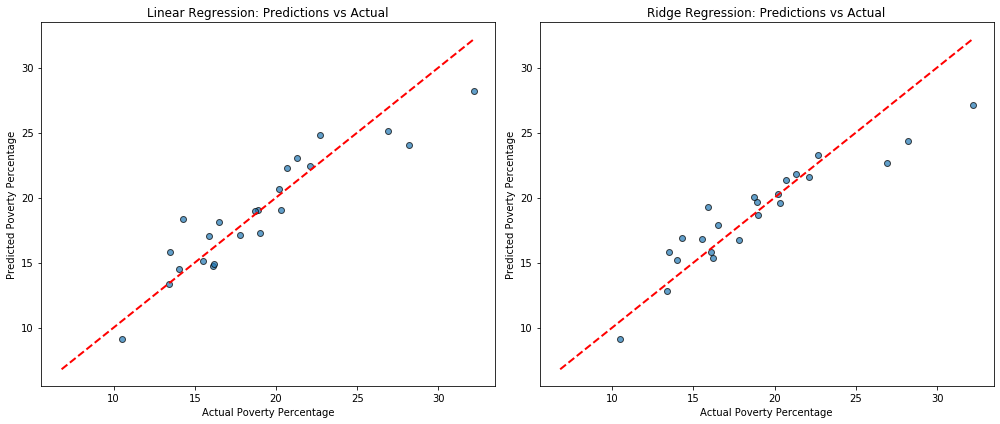

,Model,RMSE,R-squared,CV R-squared (Ridge)
0,Linear Regression,1.911994,0.855668,
1,Ridge Regression,2.039964,0.835702,0.167678


In [62]:
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)

linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# Train and evaluate Ridge Regression with Cross-Validation
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_ridge = cross_val_score(ridge_model, X, y, cv=kf, scoring='r2')
cv_mean_ridge = np.mean(cv_scores_ridge)

# Visualization: Comparison of Predictions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for Linear Regression predictions vs Actual values
ax[0].scatter(y_test, y_pred_linear, alpha=0.7, edgecolors='black')
ax[0].plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
ax[0].set_title('Linear Regression: Predictions vs Actual')
ax[0].set_xlabel('Actual Poverty Percentage')
ax[0].set_ylabel('Predicted Poverty Percentage')

# Scatter plot for Ridge Regression predictions vs Actual values
ax[1].scatter(y_test, y_pred_ridge, alpha=0.7, edgecolors='black')
ax[1].plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
ax[1].set_title('Ridge Regression: Predictions vs Actual')
ax[1].set_xlabel('Actual Poverty Percentage')
ax[1].set_ylabel('Predicted Poverty Percentage')

plt.tight_layout()
plt.show()

model_metrics = {
    'Model': ['Linear Regression', 'Ridge Regression'],
    'RMSE': [rmse_linear, rmse_ridge],
    'R-squared': [r2_linear, r2_ridge],
    'CV R-squared (Ridge)': ['', cv_mean_ridge]
}


comparison_df = pd.DataFrame(model_metrics)

comparison_df
